My first attempt at machine learning using the titanic dataset provided by Kaggle.\
Here is the link for the same: [Titanic Challenge](https://kaggle.com/c/titanic)

Resources: Verzeo, AmityPrepContent, YouTube, StackOverflow\
Softwares Used: GoogleColab, Tableau

# Importing Modules and Data

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')

Kaggle provides three datasets Test, Train and gender_submission. The first two are self explanatory but the gender_submission is the expected format of the test results that need to be uploaded back to kaggle.

# Analysis of the given data

In [ ]:
#We just need to be concerned with the test set for now, as far as I understand.
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As described on Kaggle, the columns refer to:

Variable	Definition	Key\
survival::	Survival	0 = No, 1 = Yes\
pclass::	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd\
sex::	Sex	\
Age::	Age in years	\
sibsp::	# of siblings / spouses aboard the Titanic	\
parch::	# of parents / children aboard the Titanic	\
ticket::	Ticket number	\
fare::	Passenger fare	\
cabin::	Cabin number	\
embarked::	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton\

In [ ]:
train_set.info()
train_set.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age has values missing which might be an important feature to look into.\
Cabin....well let's just hope that wont be very useful

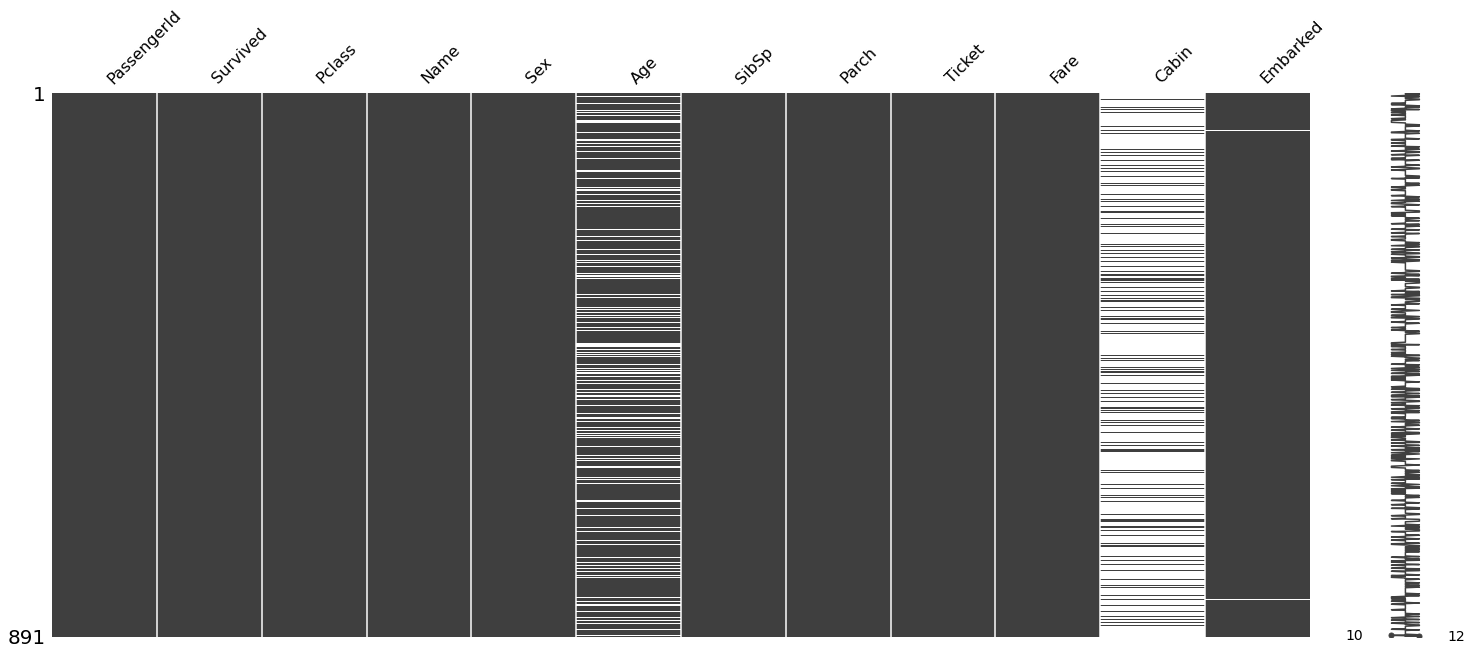

In [ ]:
msno.matrix(train_set)

In [ ]:
train_set_filled = train_set
train_set_filled.fillna(train_set_filled['Age'].mean(), inplace=True)
train_set_filled.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


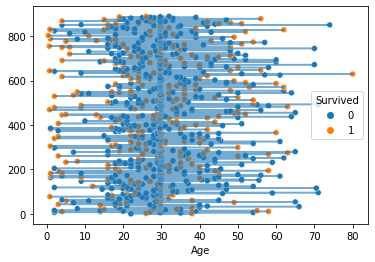

In [ ]:
sns.scatterplot(x='Age', y=range(0,len(train_set_filled)), hue='Survived', data=train_set_filled)
plt.plot('Age', range(0,len(train_set_filled)), Alpha = 100, data=train_set_filled)
plt.show()

Filling the age with mean is making me doubtful, might change this later, plotting lines over a scatterplot can be a good visualization for outliers in depth?

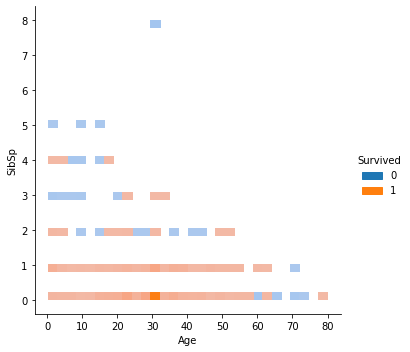

In [ ]:
sns.displot(x='Age', y='SibSp', hue='Survived', data=train_set)

I think that does it for the age column and I will be dropping the Cabin Col,  Now lets focus on visualizing the data and see the factors that affect the required feature, which is 'Survived' the most.\
I will also attempt to do some feature engineering and extract potentially useful iformation from the given columns.

In [ ]:
#Commenting out this block as I dont want to scroll trough 60 entries everytime
#train_set_filled.head(60)

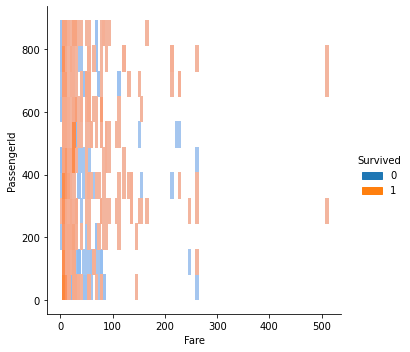

In [ ]:
sns.displot(x='Fare', y='PassengerId', hue='Survived', data=train_set_filled)

In [ ]:
#changing Initials to numbers of 6 categories
#Initial have a direct correlation to age and gender

def initials(name):
  name = name.split('.')[0]
  #print(name.split('.')[0])
  name = name.split(' ')[-1]
  #print(name.split(' ')[-1])
  if name == 'Mr':
    return 1
  elif name == 'Mrs':
    return 2
  elif name == 'Miss':
    return 3
  elif name == 'Master':
    return 4
  elif name == 'Dr':
    return 5
  else:
    return 6

#this doesn't seem to be working. Edit: Fixed
#print(initials('Braund, Mr. Owen Harris'))

In [ ]:
#Changing gender to binary values
def MorF(gender):
  if gender == 'male':
    return 0
  else:
    return 1

In [ ]:
#changing embarked location to numerical assosiations
def embarked(X):
  if X == 'S':
    return int(1)
  elif X == 'C':
    return int(2)
  elif X == 'Q':
    return int(3)

In [ ]:
#creating bins of size according tot he graph above that feels the most suitable
def price(fare):
  fare = int(fare)
  if fare in range(0, 20):
    return 1
  elif fare in range(20, 50):
    return 2
  elif fare in range(50, 100):
    return 3
  elif fare in range(100, 150):
    return 4
  elif fare in range(150, 200):
    return 5
  elif fare in range(200, 300):
    return 6
  else:
    return 7

In [ ]:
#rounding of the age to nearest 10, thanks to stackoverflow user /380451
def age(x):
  return int(math.floor(x / 10.0))

All of the repeated text used in writing those functions can be eradicated by simply using dictionaries.

In [ ]:
train_set_filled['Gender'] = train_set_filled.apply(lambda x : MorF(x['Sex']), axis=1)
train_set_filled['Initials'] = train_set_filled.apply(lambda x : initials(x['Name']), axis=1)
train_set_filled['City'] = train_set_filled.apply(lambda x : embarked(x['Embarked']), axis=1)
train_set_filled['Price'] = train_set_filled.apply(lambda x : price(x['Fare']), axis=1)
train_set_filled['AgeBin'] = train_set_filled.apply(lambda x : age(x['Age']), axis=1)
train_set_filled.info()
train_set_filled.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gender       891 non-null    int64  
 13  Initials     891 non-null    int64  
 14  City         889 non-null    float64
 15  Price        891 non-null    int64  
 16  AgeBin       891 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 118.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Initials,City,Price,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.6991,S,0,1,1.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,2,2.0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.6991,S,1,3,1.0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,2,1.0,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.6991,S,0,1,1.0,1,3
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,29.6991,Q,0,1,3.0,1,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,1,1.0,3,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,29.6991,S,0,4,1.0,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,29.6991,S,1,2,1.0,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,29.6991,C,1,2,2.0,2,1


**Mr:1, Mrs:2, Miss:3, Master:4, Dr:5, Others:6**\
Unmarried females had the highest survival rate, followed by married women followed by married men.

In [ ]:
train_set_filled['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
CA 2144             6
3101295             6
                   ..
STON/O2. 3101282    1
SC/PARIS 2133       1
367232              1
350026              1
2671                1
Name: Ticket, Length: 681, dtype: int64

Similar ticket values can be result of people buyng tickets together. A feature influenced by SipSp, Parch. What function will be suitable for extraction of this. 681 values are still too much.

In [ ]:
def ticket_extract(value):
  for x in value:
    for y in x:
      return x
  
def ticket_bin(value):
  keys = {'S':10, 'P':11, 'C':12, 'A':13, 'W':14, 'F':15, 'L':16}
  try:
    return int(value)
  except:
    return keys[value]


In [ ]:
train_set_filled['TicketBin'] = train_set_filled.apply(lambda x : ticket_extract(x['Ticket']), axis=1)
train_set_filled['TicketInt'] = train_set_filled.apply(lambda x : ticket_bin(x['TicketBin']), axis=1)

In [ ]:
train_set_filled['TicketInt'].value_counts()

3     301
2     183
1     146
11     65
10     65
12     47
13     29
14     13
4      10
7       9
15      7
6       6
16      4
5       3
8       2
9       1
Name: TicketInt, dtype: int64

In [ ]:
train_set_filled['TicketBin'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: TicketBin, dtype: int64

16 categories from 681, which is a great jump. Let's see if this has any correlation to the rate of survival


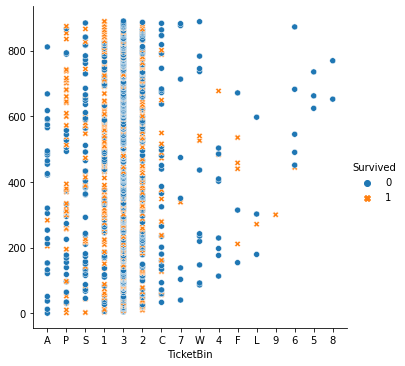

In [ ]:
sns.relplot(x='TicketBin', y=range(0,len(train_set_filled)), hue='Survived', style='Survived', data=train_set_filled)

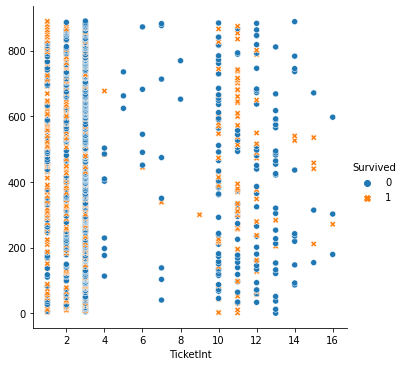

In [ ]:
sns.relplot(x='TicketInt', y=range(0,len(train_set_filled)), hue='Survived', style='Survived', data=train_set_filled)

It is plotting points at 30 for ticketInt? Interesting [FIXED: Mistyped value in Dict]

Very interesting, the ticket prices influence rate of death significantly, as I suppose this feature declares cabins and can work as a valid substitute. I think cabin initials can be extracted too correlating available values to the ticket bracket and fre bins they fall into. I don't yet know how to implement this feature.

In [ ]:
train_set_filled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Initials,City,Price,AgeBin,TicketBin,TicketInt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.6991,S,0,1,1.0,1,2,A,13
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,2.0,3,3,P,11
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.6991,S,1,3,1.0,1,2,S,10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1.0,3,3,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.6991,S,0,1,1.0,1,3,3,3


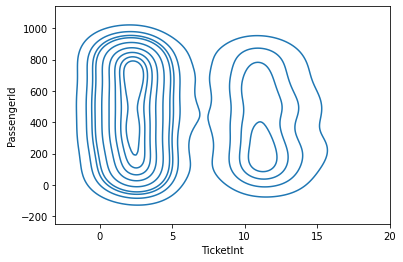

In [ ]:
sns.kdeplot(x='TicketInt', y= 'PassengerId', data=train_set_filled)

Gawddamn, I don't get it but its beautiful. Looks like a density cluster.

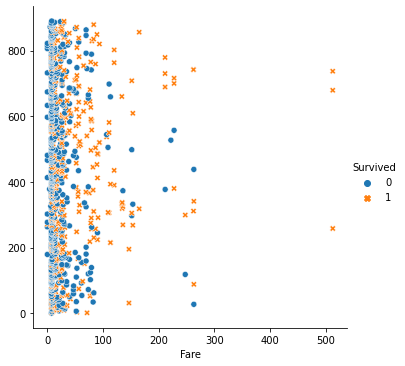

In [ ]:
sns.relplot(x='Fare', y=range(0,len(train_set_filled)), hue='Survived', style='Survived', data=train_set_filled)

Higher ticket prices have a higher death ratio

In [ ]:
train_cleanup = pd.DataFrame() #Declaring a new dataframe
cols = ['Survived', 'City', 'Initials', 'Gender', 'Pclass', 'Price', 'Parch', 'SibSp', 'AgeBin', 'TicketInt']
for x in cols:
 train_cleanup[x] = train_set_filled[x]

train_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   City       889 non-null    float64
 2   Initials   891 non-null    int64  
 3   Gender     891 non-null    int64  
 4   Pclass     891 non-null    int64  
 5   Price      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   SibSp      891 non-null    int64  
 8   AgeBin     891 non-null    int64  
 9   TicketInt  891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


Why is the city coming to be as float datatype? I used the same technique for everything.

**Further looked into the data using Tableau**

In [ ]:
train_cleanup['City'].count()

889

Missing values wontlet your df function as intented. Noted.

In [ ]:
train_cleanup.fillna(train_cleanup['City'].mean(), inplace=True)
train_cleanup['City'].count()

891

In [ ]:
train_cleanup['City'] = train_cleanup['City'].astype(int)

In [ ]:
#Borrowed by the same amazing Individual whom I mentioned below and referenced the workbook of.
train_cleanup.head()
one_hot_cols = train_cleanup.columns.tolist()
one_hot_cols.remove('Survived')
TrainSet = pd.get_dummies(train_cleanup, columns=one_hot_cols)
TrainSet.head()

,Survived,City_1,City_2,City_3,Initials_1,Initials_2,Initials_3,Initials_4,Initials_5,Initials_6,Gender_0,Gender_1,Pclass_1,Pclass_2,Pclass_3,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,AgeBin_0,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,TicketInt_1,TicketInt_2,TicketInt_3,TicketInt_4,TicketInt_5,TicketInt_6,TicketInt_7,TicketInt_8,TicketInt_9,TicketInt_10,TicketInt_11,TicketInt_12,TicketInt_13,TicketInt_14,TicketInt_15,TicketInt_16
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Yoooooo!! Yay\
One last check to see if any other possible extractable features\
**Mr:1, Mrs:2, Miss:3, Master:4, Dr:5, Others:6**\

In [ ]:
#sns.pairplot(hue_order='Initials', data=train_cleanup)
#Used this paiPlotto create the 1:1 design

In [ ]:
TrainData = train_cleanup
TrainData.head()

,Survived,City,Initials,Gender,Pclass,Price,Parch,SibSp,AgeBin,TicketInt
0,0,1,1,0,3,1,0,1,2,13
1,1,2,2,1,1,3,0,1,3,11
2,1,1,3,1,3,1,0,0,2,10
3,1,1,2,1,1,3,0,1,3,1
4,0,1,1,0,3,1,0,0,3,3


## Prediction Models

I will cycle trough different algorithms and see what kind of result and behind the scenes working each has to get a better understanding for the use cases.

**Desicion Tree**\
[Reference](https://www.twilio.com/blog/predict-wins-losses-scikitlearn-sms)

In [ ]:
from sklearn import tree #Importing the desicion tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
x_Data = TrainSet.drop('Survived', axis=1)
y_Data = TrainSet.Survived

In [ ]:
x_Data.columns

Index(['City_1', 'City_2', 'City_3', 'Initials_1', 'Initials_2', 'Initials_3',
       'Initials_4', 'Initials_5', 'Initials_6', 'Gender_0', 'Gender_1',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Price_6', 'Price_7', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'AgeBin_0', 'AgeBin_1', 'AgeBin_2', 'AgeBin_3', 'AgeBin_4', 'AgeBin_5',
       'AgeBin_6', 'AgeBin_7', 'AgeBin_8', 'TicketInt_1', 'TicketInt_2',
       'TicketInt_3', 'TicketInt_4', 'TicketInt_5', 'TicketInt_6',
       'TicketInt_7', 'TicketInt_8', 'TicketInt_9', 'TicketInt_10',
       'TicketInt_11', 'TicketInt_12', 'TicketInt_13', 'TicketInt_14',
       'TicketInt_15', 'TicketInt_16'],
      dtype='object')

In [ ]:
y_Data.shape

(891,)

In [ ]:
x_Data.shape

(891, 60)

In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
#Fitting the model with data

Model1 = tree.DecisionTreeClassifier() #Desicion Tree Classification Method
Model1 = Model1.fit(x_Data, y_Data) #How doe sit utilize the Survived list, Is this how the ppreffered output method is defined too?

accuracy = np.mean(cross_val_score(Model1, x_Data, y_Data, scoring='accuracy')) * 100
print("Accuracy: {}%".format(accuracy))


Accuracy: 77.3316176009039%


In [ ]:
#Why is the desicion tree classifier used at the bottom giving a drastically different result?

In [ ]:
acc_cv_dt = model_selection.cross_val_predict(DecisionTreeClassifier(), x_Data, y_Data, cv=10, n_jobs = -1)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy CV 10-Fold: [0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0

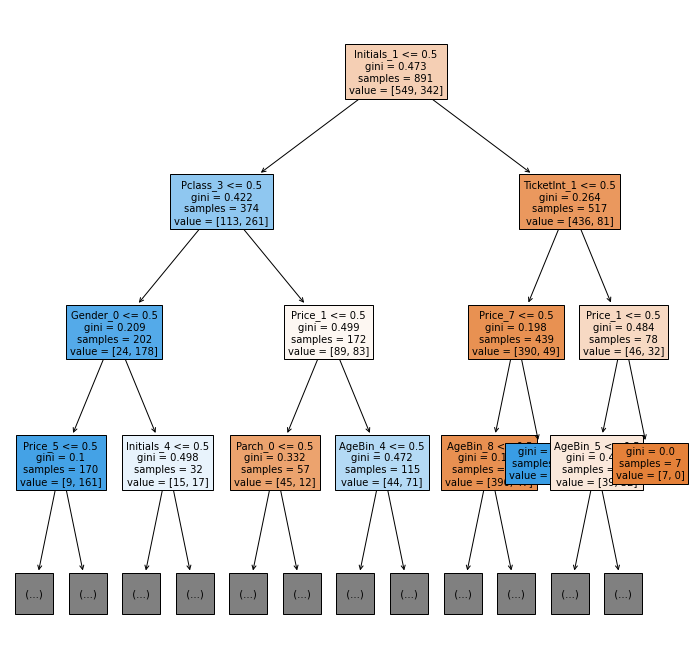

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(Model1, fontsize=10, feature_names=x_Data.columns, max_depth=3, filled=True)
plt.show()

In [ ]:
#Ooh, The test dataset.
#I wonder if I can directly run t or I need to extract everything again.

[Reference](https://www.mathworks.com/matlabcentral/answers/500549-after-training-data-how-to-test-data-in-classification-learner-app)

In [ ]:
from sklearn.model_selection import cross_validate

I did the data analysis, Need to close this project and move on so I will use [This notebook](https://www.youtube.com/watch?v=f1y9wDDxWnA&feature=youtu.be) to run algorithms and come back again at a later period.

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
selected_df = TrainSet
selected_df.head()

,Survived,City_1,City_2,City_3,Initials_1,Initials_2,Initials_3,Initials_4,Initials_5,Initials_6,Gender_0,Gender_1,Pclass_1,Pclass_2,Pclass_3,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,AgeBin_0,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,TicketInt_1,TicketInt_2,TicketInt_3,TicketInt_4,TicketInt_5,TicketInt_6,TicketInt_7,TicketInt_8,TicketInt_9,TicketInt_10,TicketInt_11,TicketInt_12,TicketInt_13,TicketInt_14,TicketInt_15,TicketInt_16
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [ ]:
X_train.shape

(891, 60)

In [ ]:
y_train.shape

(891,)

## Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

A major portion of this section has been borrowed from another author.

##Important to understand

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv #returned

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), #inputs
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.73
Accuracy CV 10-Fold: 82.04
Running Time: 0:00:00.404014


In [ ]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 85.97
Accuracy CV 10-Fold: 80.25
Running Time: 0:00:00.250246


In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 47.7
Accuracy CV 10-Fold: 46.35
Running Time: 0:00:00.074276


Very interesting, Need to see how this one works.

In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 83.95
Accuracy CV 10-Fold: 82.04
Running Time: 0:00:00.185094


In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 82.38
Accuracy CV 10-Fold: 74.64
Running Time: 0:00:00.166680


In [ ]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 91.47
Accuracy CV 10-Fold: 78.34
Running Time: 0:00:00.094517


In [ ]:
## Gradient Boosting Trees
#start_time = time.time()
##train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
##                                                                       X_train, 
##                                                                      y_train,
##                                                                       10)
#GradientBoost = GradientBoostingClassifier(iterations=1000,
#                                    custom_loss=['Accuracy'],
#                                    loss_function='Logloss')

#GradientBoost.fit(X_train, y_train, plot=True)
#acc_catboost = round(GradientBoost.score(X_train, y_train) * 100, 2)

#gbt_time = (time.time() - start_time)
#print("Accuracy: %s" % acc_gbt)
#print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
#print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.53
Accuracy CV 10-Fold: 82.83
Running Time: 0:00:01.547763


In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,91.47
6,Gradient Boosting Trees,86.53
0,KNN,85.97
4,Linear SVC,83.95
1,Logistic Regression,83.73
3,Stochastic Gradient Decent,82.38
2,Naive Bayes,47.70


Wow! This is so fascinating. Didn't use the catboost algorithm.

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,82.83
1,Logistic Regression,82.04
4,Linear SVC,82.04
0,KNN,80.25
5,Decision Tree,78.34
3,Stochastic Gradient Decent,74.64
2,Naive Bayes,46.35


In [ ]:
#fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
#fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
#_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [ ]:
#metrics = ['Precision', 'Recall', 'F1', 'AUC']
#
#eval_metrics = algo.eval_metrics(train_pool,
#                                           metrics=metrics,
#                                           plot=True)
#
#for metric in metrics:
#   print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

In [ ]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test_set['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test_set['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test_set['Pclass'], 
                                   prefix='pclass')

In [ ]:
# Combine the test one hot encoded columns with test
test = pd.concat([test_set, #Make sure to have the proper df selected
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [ ]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [ ]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['City_1', 'City_2', 'City_3', 'Initials_1', 'Initials_2', 'Initials_3',
       'Initials_4', 'Initials_5', 'Initials_6', 'Gender_0', 'Gender_1',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Price_6', 'Price_7', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'AgeBin_0', 'AgeBin_1', 'AgeBin_2', 'AgeBin_3', 'AgeBin_4', 'AgeBin_5',
       'AgeBin_6', 'AgeBin_7', 'AgeBin_8', 'TicketInt_1', 'TicketInt_2',
       'TicketInt_3', 'TicketInt_4', 'TicketInt_5', 'TicketInt_6',
       'TicketInt_7', 'TicketInt_8', 'TicketInt_9', 'TicketInt_10',
       'TicketInt_11', 'TicketInt_12', 'TicketInt_13', 'TicketInt_14',
       'TicketInt_15', 'TicketInt_16'],
      dtype='object')

In [ ]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [ ]:
lr_list = [0.001, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 5, 10]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.001
Accuracy score (training): 0.623
Accuracy score (validation): 0.601
Learning rate:  0.05
Accuracy score (training): 0.668
Accuracy score (validation): 0.627
Learning rate:  0.075
Accuracy score (training): 0.738
Accuracy score (validation): 0.690
Learning rate:  0.1
Accuracy score (training): 0.766
Accuracy score (validation): 0.728
Learning rate:  0.25
Accuracy score (training): 0.803
Accuracy score (validation): 0.761
Learning rate:  0.5
Accuracy score (training): 0.830
Accuracy score (validation): 0.810
Learning rate:  0.75
Accuracy score (training): 0.830
Accuracy score (validation): 0.795
Learning rate:  1
Accuracy score (training): 0.831
Accuracy score (validation): 0.795
Learning rate:  1.25
Accuracy score (training): 0.836
Accuracy score (validation): 0.791
Learning rate:  1.5
Accuracy score (training): 0.839
Accuracy score (validation): 0.791
Learning rate:  1.75
Accuracy score (training): 0.825
Accuracy score (validation): 0.765
Learning rate:  2
Accurac

In [ ]:
lr_list = [0.45, 0.5, 0.55, 0.60, 0.65, 0.7]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.45
Accuracy score (training): 0.835
Accuracy score (validation): 0.799
Learning rate:  0.5
Accuracy score (training): 0.830
Accuracy score (validation): 0.810
Learning rate:  0.55
Accuracy score (training): 0.830
Accuracy score (validation): 0.813
Learning rate:  0.6
Accuracy score (training): 0.833
Accuracy score (validation): 0.821
Learning rate:  0.65
Accuracy score (training): 0.843
Accuracy score (validation): 0.817
Learning rate:  0.7
Accuracy score (training): 0.836
Accuracy score (validation): 0.810


In [ ]:
lr_list = [0.58, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.58
Accuracy score (training): 0.830
Accuracy score (validation): 0.813
Learning rate:  0.6
Accuracy score (training): 0.833
Accuracy score (validation): 0.821
Learning rate:  0.61
Accuracy score (training): 0.833
Accuracy score (validation): 0.821
Learning rate:  0.62
Accuracy score (training): 0.833
Accuracy score (validation): 0.821
Learning rate:  0.63
Accuracy score (training): 0.843
Accuracy score (validation): 0.821
Learning rate:  0.64
Accuracy score (training): 0.843
Accuracy score (validation): 0.821
Learning rate:  0.65
Accuracy score (training): 0.843
Accuracy score (validation): 0.817


Is this what the minima refers to, local minima? but then its gradient boosting, it it has a single crest graph then this will be the global minima as far as I know, need to check graph.

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.6, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[143  18]
 [ 30  77]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       161
           1       0.81      0.72      0.76       107

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['City_1', 'City_2', 'City_3', 'Initials_1', 'Initials_2', 'Initials_3',
       'Initials_4', 'Initials_5', 'Initials_6', 'Gender_0', 'Gender_1',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Price_6', 'Price_7', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'AgeBin_0', 'AgeBin_1', 'AgeBin_2', 'AgeBin_3', 'AgeBin_4', 'AgeBin_5',
       'AgeBin_6', 'AgeBin_7', 'AgeBin_8', 'TicketInt_1', 'TicketInt_2',
       'TicketInt_3', 'TicketInt_4', 'TicketInt_5', 'TicketInt_6',
       'TicketInt_7', 'TicketInt_8', 'TicketInt_9', 'TicketInt_10',
       'TicketInt_11', 'TicketInt_12', 'TicketInt_13', 'TicketInt_14',
       'TicketInt_15', 'TicketInt_16'],
      dtype='object')

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)
test_set['Age'].fillna(test_set['Age'].mean(), inplace=True)

In [ ]:
test_set_filled = pd.DataFrame()
test_set_filled = test_set
test_set_filled['Gender'] = test_set.apply(lambda x : MorF(x['Sex']), axis=1)
test_set_filled['Initials'] = test_set.apply(lambda x : initials(x['Name']), axis=1)
test_set_filled['City'] = test_set.apply(lambda x : embarked(x['Embarked']), axis=1)
test_set_filled['Price'] = test_set.apply(lambda x : price(x['Fare']), axis=1)
test_set_filled['AgeBin'] = test_set.apply(lambda x : age(x['Age']), axis=1)
test_set_filled['TicketBin'] = test_set.apply(lambda x : ticket_extract(x['Ticket']), axis=1)
test_set_filled['TicketInt'] = test_set.apply(lambda x : ticket_bin(x['TicketBin']), axis=1)

In [ ]:
test_cleanup = pd.DataFrame() #Declaring a new dataframe
cols = ['City', 'Initials', 'Gender', 'Pclass', 'Price', 'Parch', 'SibSp', 'AgeBin', 'TicketInt']
for x in cols:
 test_cleanup[x] = test_set_filled[x]

test_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City       418 non-null    int64
 1   Initials   418 non-null    int64
 2   Gender     418 non-null    int64
 3   Pclass     418 non-null    int64
 4   Price      418 non-null    int64
 5   Parch      418 non-null    int64
 6   SibSp      418 non-null    int64
 7   AgeBin     418 non-null    int64
 8   TicketInt  418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB


In [ ]:
#Borrowed by the same amazing Individual whom I mentioned above and referenced the workbook of.
one_hot_cols = test_cleanup.columns.tolist()
TestSet = pd.get_dummies(test_cleanup, columns=one_hot_cols)
TestSet.head()

,City_1,City_2,City_3,Initials_1,Initials_2,Initials_3,Initials_4,Initials_5,Initials_6,Gender_0,Gender_1,Pclass_1,Pclass_2,Pclass_3,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,AgeBin_0,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,TicketInt_1,TicketInt_2,TicketInt_3,TicketInt_4,TicketInt_6,TicketInt_7,TicketInt_9,TicketInt_10,TicketInt_11,TicketInt_12,TicketInt_13,TicketInt_14,TicketInt_15,TicketInt_16
0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
TrainSet['AgeBin_8'].value_counts()

0    890
1      1
Name: AgeBin_8, dtype: int64

In [ ]:
TrainSet['TicketInt_8'].value_counts()

0    889
1      2
Name: TicketInt_8, dtype: int64

In [ ]:
TrainSet['TicketInt_5'].value_counts()

0    888
1      3
Name: TicketInt_5, dtype: int64

Need to drop these rows as the value it utilizes doesnt signify in the test set. Column Mismatch, Can't predict.

In [ ]:
#predictions = gb_clf2.predict(TestSet[wanted_test_columns])
#predictions[:50]

In [ ]:
columns= ['TicketInt_8', 'AgeBin_8', 'TicketInt_5']
for x in columns:
  TestSet[x] = 0

In [ ]:
TestSet.head()

,City_1,City_2,City_3,Initials_1,Initials_2,Initials_3,Initials_4,Initials_5,Initials_6,Gender_0,Gender_1,Pclass_1,Pclass_2,Pclass_3,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,AgeBin_0,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,TicketInt_1,TicketInt_2,TicketInt_3,TicketInt_4,TicketInt_6,TicketInt_7,TicketInt_9,TicketInt_10,TicketInt_11,TicketInt_12,TicketInt_13,TicketInt_14,TicketInt_15,TicketInt_16,TicketInt_8,AgeBin_8,TicketInt_5
0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = gb_clf2.predict(TestSet[wanted_test_columns])
predictions[:50]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1])

FINALLLLLLY. OOOOOF

In [ ]:
TestSet['PassengerId'] = test['PassengerId']

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = TestSet['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#This is fancy haha
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/TitanicGradientBoost.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [ ]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Survived      891 non-null    int64
 1   City_1        891 non-null    uint8
 2   City_2        891 non-null    uint8
 3   City_3        891 non-null    uint8
 4   Initials_1    891 non-null    uint8
 5   Initials_2    891 non-null    uint8
 6   Initials_3    891 non-null    uint8
 7   Initials_4    891 non-null    uint8
 8   Initials_5    891 non-null    uint8
 9   Initials_6    891 non-null    uint8
 10  Gender_0      891 non-null    uint8
 11  Gender_1      891 non-null    uint8
 12  Pclass_1      891 non-null    uint8
 13  Pclass_2      891 non-null    uint8
 14  Pclass_3      891 non-null    uint8
 15  Price_1       891 non-null    uint8
 16  Price_2       891 non-null    uint8
 17  Price_3       891 non-null    uint8
 18  Price_4       891 non-null    uint8
 19  Price_5       891 non-null   

In [ ]:
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   City_1        418 non-null    uint8
 1   City_2        418 non-null    uint8
 2   City_3        418 non-null    uint8
 3   Initials_1    418 non-null    uint8
 4   Initials_2    418 non-null    uint8
 5   Initials_3    418 non-null    uint8
 6   Initials_4    418 non-null    uint8
 7   Initials_5    418 non-null    uint8
 8   Initials_6    418 non-null    uint8
 9   Gender_0      418 non-null    uint8
 10  Gender_1      418 non-null    uint8
 11  Pclass_1      418 non-null    uint8
 12  Pclass_2      418 non-null    uint8
 13  Pclass_3      418 non-null    uint8
 14  Price_1       418 non-null    uint8
 15  Price_2       418 non-null    uint8
 16  Price_3       418 non-null    uint8
 17  Price_4       418 non-null    uint8
 18  Price_5       418 non-null    uint8
 19  Price_6       418 non-null   

In [ ]:
TrainSet.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/TitanicTrain.csv', index=False)
TestSet.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/TitanicTest.csv', index=False)

In [113]:
for x in TestSet.columns:
  if x not in TrainSet.columns:
    print(x)

Parch_9
PassengerId


In [108]:
TrainSet['Initials_1'].value_counts()

1    517
0    374
Name: Initials_1, dtype: int64

In [109]:
TestSet['Initials_1'].value_counts()

1    240
0    178
Name: Initials_1, dtype: int64

In [111]:
TestSet.shape

(418, 62)